# Reconocimiento Facial

In [5]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt

In [2]:
faces = fetch_lfw_people(min_faces_per_person=60)#Descargamos fotos

In [3]:
print(faces.target_names)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']


In [4]:
print(faces.images.shape)

(1348, 62, 47)


Cada imágen tiene 62 x 47 de tamaño, o sea 2914 píxeles en total.

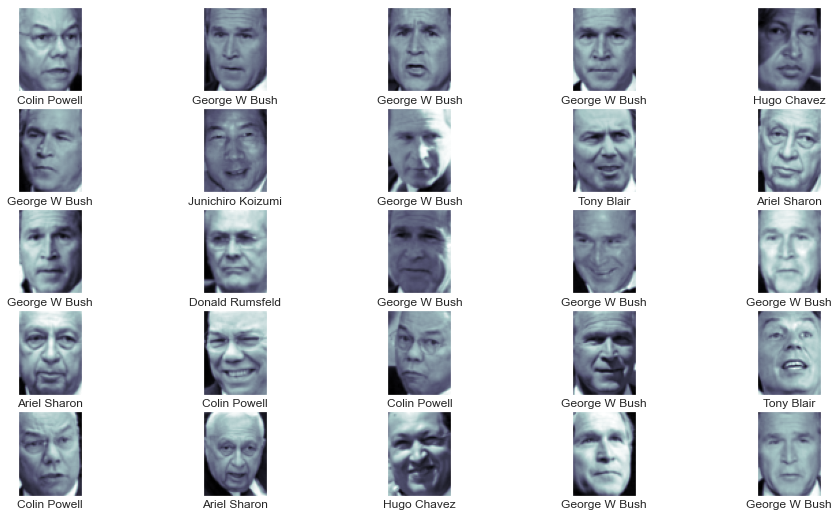

In [77]:
fig, ax = plt.subplots(5,5, figsize=(16,9))
for i, ax_i in enumerate(ax.flat):
    ax_i.imshow(faces.images[i], cmap="bone")
    ax_i.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])
#xticks e yticks son la medidas de los costados, las colocamos vacías.
#xlabel, será el nombre de la actual foto

In [14]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

El pipeline es el sistema que utilizan las consolas de desarrollador para ir encadenando instrucciones una tras otra entonces se hace un análisis de componentes principales para las imágenes y luego aplicarle un SVC. Para ello se puede combinar ambas operaciones con una pipeline las puedo llevar a cabo con un proceso de modelización único.

In [15]:
pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel="rbf", class_weight="balanced")
model = make_pipeline(pca, svc)

In [16]:
from sklearn.model_selection import train_test_split

In [29]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(faces.data, faces.target, random_state = 42)

In [30]:
from sklearn.model_selection import GridSearchCV

In [61]:
param_grid = {
    "svc__C":range(1,50,1),
    "svc__gamma":[0.0001, 0.0005, 0.001, 0.005, 0.01]
}

In [62]:
grid = GridSearchCV(model, param_grid)

In [63]:
%time grid.fit(Xtrain, Ytrain)

Wall time: 4min 10s


GridSearchCV(estimator=Pipeline(steps=[('pca',
                                        PCA(n_components=150, random_state=42,
                                            whiten=True)),
                                       ('svc', SVC(class_weight='balanced'))]),
             param_grid={'svc__C': range(1, 50),
                         'svc__gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01]})

In [65]:
print(grid.best_params_)

{'svc__C': 9, 'svc__gamma': 0.001}


In [66]:
classifier = grid.best_estimator_
yfit = classifier.predict(Xtest)

Text(0.5, 0.98, 'Predicciones de las imágenes (incorrectas en rojo)')

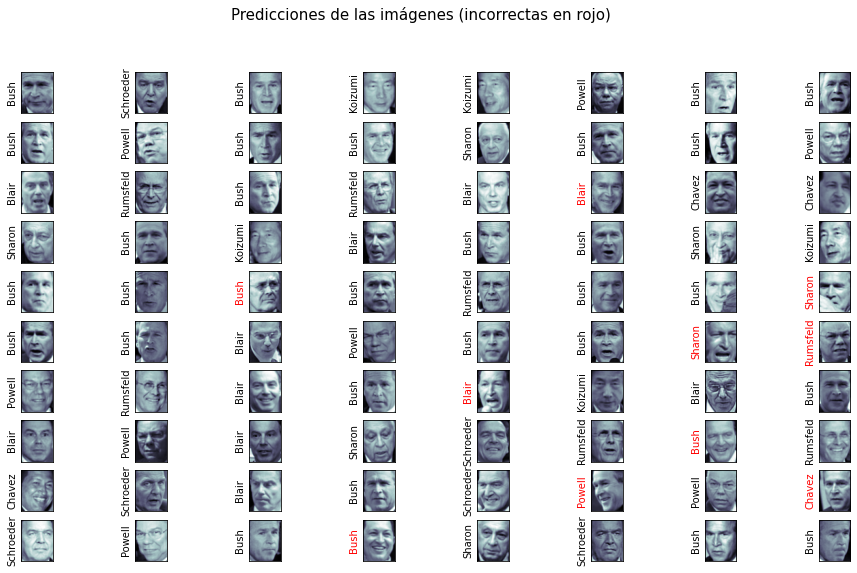

In [67]:
fig, ax = plt.subplots(10,8, figsize=(16,9))
for i, ax_i in enumerate(ax.flat):
    ax_i.imshow(Xtest[i].reshape(62,47), cmap="bone")
    ax_i.set(xticks=[], yticks=[])
    ax_i.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color = "black" if yfit[i]==Ytest[i] else "red")
fig.suptitle("Predicciones de las imágenes (incorrectas en rojo)", size = 15)

In [68]:
from sklearn.metrics import classification_report

In [69]:
print(classification_report(Ytest, yfit, target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.86      0.83      0.84        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.85      0.95      0.90        42

         accuracy                           0.85       337
        macro avg       0.83      0.84      0.84       337
     weighted avg       0.86      0.85      0.85       337



In [70]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()

In [72]:
mat = confusion_matrix(Ytest, yfit)
mat

array([[ 11,   1,   2,   1,   0,   0,   0,   0],
       [  2,  59,   2,   3,   0,   0,   0,   2],
       [  1,   2,  26,   1,   0,   0,   0,   1],
       [  2,  11,   3, 105,   2,   1,   0,   2],
       [  0,   0,   1,   1,  19,   0,   1,   1],
       [  1,   1,   0,   2,   1,  14,   0,   1],
       [  0,   0,   0,   0,   0,   0,  12,   0],
       [  0,   0,   1,   1,   0,   0,   0,  40]], dtype=int64)

<AxesSubplot:>

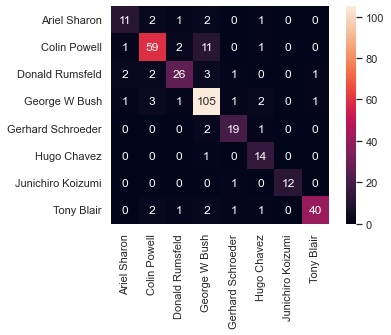

In [75]:
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True, xticklabels=faces.target_names,
           yticklabels=faces.target_names)#La barra cbar puede estar o no